In [1]:
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)

In [2]:
# constants
RUN_SUMMARY_LOC = '../run_summaries/'

In [3]:
all_results = pd.DataFrame()
for file_ in glob.glob(os.path.join(RUN_SUMMARY_LOC, '*.csv')):
    temp = pd.read_csv(file_)
    all_results = all_results.append(temp)

In [4]:
all_results = all_results.sort_values(['run_name', 
                                       'iteration', 
                                       'timestamp', 
                                       'accuracy_test', 
                                       'accuracy_val', 
                                       'accuracy_train'])

In [5]:
all_results['run_name'].unique()

array(['npop=50_sigma=0.1_alpha=0.001_iters=5000_type=run'], dtype=object)

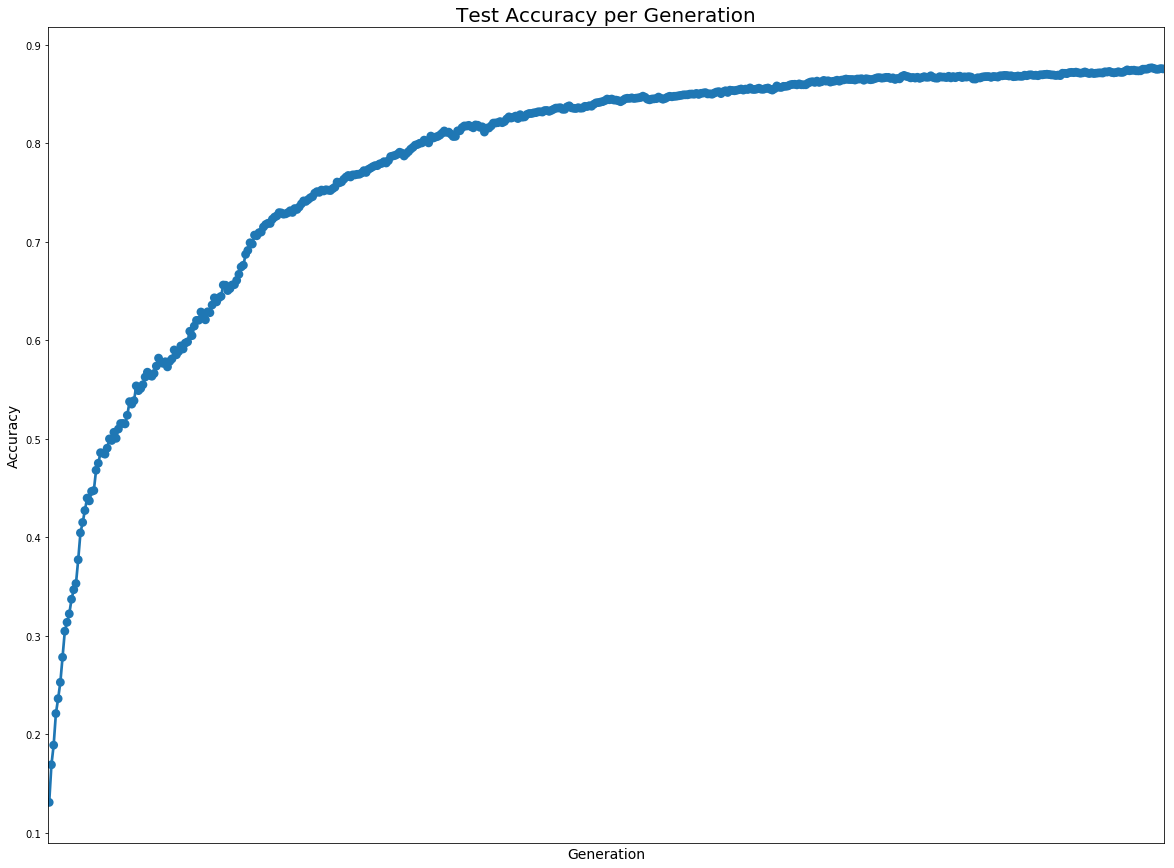

In [6]:
fig, ax = plt.subplots(figsize=(20,15))
sns.pointplot(x='iteration', y='accuracy_test', hue='run_name', data=all_results)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Test Accuracy per Generation', fontsize=20)
plt.xlabel('Generation', fontsize=14)
plt.xticks(rotation=90)
ax.legend_.remove()
ax.get_xaxis().set_ticks([])
plt.show()

In [11]:
pretty_results = all_results.loc[all_results['iteration']==4940, ['run_name', 'accuracy_test', 'accuracy_val', 'accuracy_train']].sort_values(['accuracy_test'], ascending=False)
pretty_results['run_name'] = pretty_results.apply(lambda x: x['run_name'][0:-9], axis=1)
pretty_results['accuracy_test'] = pretty_results.apply(lambda x:  "{0:.2f}%".format(
    x['accuracy_test']*100), axis=1)
pretty_results['accuracy_val'] = pretty_results.apply(
    lambda x: "{0:.2f}%".format(x['accuracy_val']*100), axis=1)
pretty_results['accuracy_train'] = pretty_results.apply(
    lambda x:  "{0:.2f}%".format(x['accuracy_train']*100), axis=1)
pretty_results

,run_name,accuracy_test,accuracy_val,accuracy_train
494,npop=50_sigma=0.1_alpha=0.001_iters=5000,87.67%,86.82%,89.06%
